In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
from matplotlib.ticker import PercentFormatter
df = pd.read_csv(r'D:\data analyst\datacleaning\restaurant\restaurant_sales_data.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [55]:
df['Order Date Month No'] = df['Order Date'].dt.month

In [56]:
df_main_dish = df[(df['Category'] == 'Main Dishes') & (df['Order Date'].dt.year == 2023)].copy()

df_main_dish

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Order Date Month No
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,9
7,ORD_146656,CUST_077,Main Dishes,NaN,15.0,3.0,45.0,2023-02-15,Cash,2
11,ORD_726419,CUST_025,Main Dishes,Salmon,18.0,5.0,90.0,2023-10-30,Cash,10
12,ORD_754176,CUST_047,Main Dishes,Salmon,18.0,1.0,18.0,2023-04-11,Cash,4
20,ORD_845047,CUST_052,Main Dishes,Vegetarian Platter,14.0,4.0,56.0,2023-02-21,Digital Wallet,2
...,...,...,...,...,...,...,...,...,...,...
17480,ORD_771570,CUST_093,Main Dishes,Salmon,18.0,2.0,36.0,2023-03-24,Credit Card,3
17490,ORD_900549,CUST_047,Main Dishes,Salmon,18.0,2.0,36.0,2023-04-25,Digital Wallet,4
17495,ORD_872487,CUST_017,Main Dishes,Steak,20.0,5.0,100.0,2023-11-01,Credit Card,11
17525,ORD_326555,CUST_095,Main Dishes,Pasta Alfredo,12.0,3.0,36.0,2023-07-24,Digital Wallet,7


In [57]:
df_main_dish_pivot = df_main_dish.pivot_table(index='Order Date Month No',columns='Item',aggfunc='size')
df_main_dish_pivot.loc['Total'] = df_main_dish_pivot.sum()
df_main_dish_pivot = df_main_dish_pivot[df_main_dish_pivot.loc['Total'].sort_values(ascending=False).index]
df_main_dish_pivot = df_main_dish_pivot.drop('Total')

df_main_dish_pivot

Item,Pasta Alfredo,Grilled Chicken,Steak,Salmon,Vegetarian Platter
Order Date Month No,,,,,
1,27,35,19,18,13
2,42,24,17,21,12
3,44,34,30,15,16
4,36,33,28,19,17
5,42,44,31,17,17
6,48,28,25,14,16
7,38,38,22,17,13
8,42,43,25,14,17
9,44,33,14,17,14


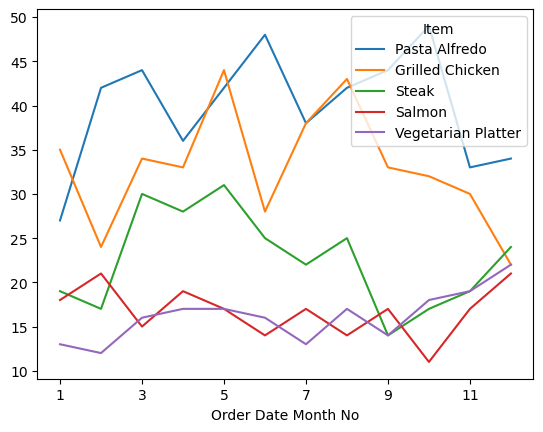

In [58]:

df_main_dish_pivot.plot(kind='line')

plt.show()

In [59]:
df_main_total = df_main_dish.groupby('Order Date Month No').size()
df_main_total

Order Date Month No
1     129
2     128
3     157
4     151
5     162
6     143
7     138
8     162
9     131
10    144
11    127
12    137
dtype: int64

In [64]:
df_main_dish_percent = df_main_dish_pivot.iloc[:12].div(df_main_total/100,axis=0)
df_main_dish_percent = df_main_dish_percent.reset_index()

df_main_dish_percent['Order Date Month'] = (df_main_dish_percent['Order Date Month No']
                                            .apply(lambda x: pd.to_datetime(x, format="%m")
                                                   .strftime("%b")))

df_main_dish_percent = df_main_dish_percent.set_index('Order Date Month')
df_main_dish_percent = df_main_dish_percent.drop(columns='Order Date Month No')

df_main_dish_percent

Item,Pasta Alfredo,Grilled Chicken,Steak,Salmon,Vegetarian Platter
Order Date Month,,,,,
Jan,20.930233,27.131783,14.728682,13.953488,10.077519
Feb,32.812500,18.750000,13.281250,16.406250,9.375000
Mar,28.025478,21.656051,19.108280,9.554140,10.191083
Apr,23.841060,21.854305,18.543046,12.582781,11.258278
May,25.925926,27.160494,19.135802,10.493827,10.493827
Jun,33.566434,19.580420,17.482517,9.790210,11.188811
Jul,27.536232,27.536232,15.942029,12.318841,9.420290
Aug,25.925926,26.543210,15.432099,8.641975,10.493827
Sep,33.587786,25.190840,10.687023,12.977099,10.687023


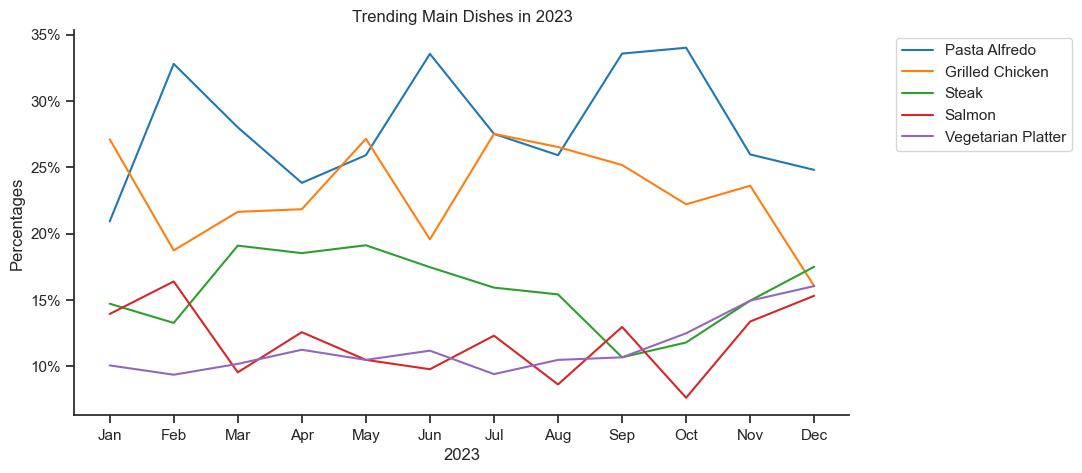

In [92]:
df_plot = df_main_dish_percent.iloc[:,:5]
plt.figure(figsize=(10, 5)) 
sns.set_theme(style='ticks')
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.despine()
plt.title('Trending Main Dishes in 2023')
plt.ylabel('Percentages')
plt.xlabel('2023')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
''''
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')'
'''''
plt.show()